In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
bank = pd.read_csv(r"C:\Users\sanjay\Desktop\GreyAtom\train.csv")
bank.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,26010,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,40194,78,retired,married,basic.4y,no,no,no,cellular,jul,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,297,36,admin.,married,university.degree,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,36344,59,retired,divorced,university.degree,no,no,no,cellular,jun,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


In [99]:
bank.shape

(32950, 22)

In [100]:
bank.dtypes

Id                  int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [101]:
bank = bank.drop_duplicates()
bank.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,26010,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,40194,78,retired,married,basic.4y,no,no,no,cellular,jul,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,297,36,admin.,married,university.degree,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,36344,59,retired,divorced,university.degree,no,no,no,cellular,jun,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


In [102]:
bank.shape #no suplicates were there

(32950, 22)

### Missing Value

In [103]:
## 1. Analyze Missing value
feature_nan = [feature for feature in bank.columns if bank[feature].isnull().sum()>0]
print(len(feature_nan)) #seeing missing value of both conti+categ features (complete bank dataset)

0


In [104]:
conti_feature = [feature for feature in bank.columns if bank[feature].dtypes != 'O']
print(len(conti_feature))

11


### Analyse Continuous variable - Univariate and Bivariate too

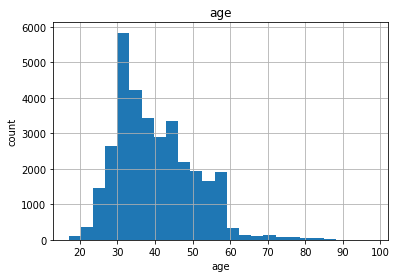

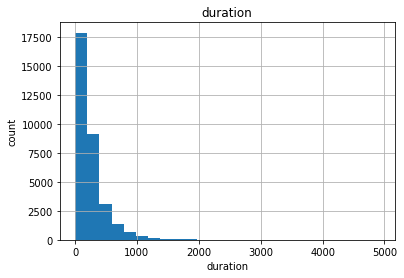

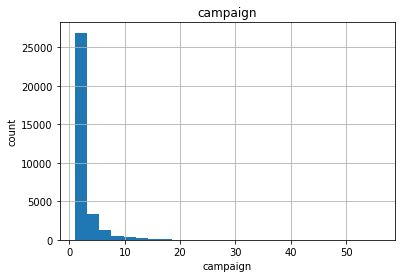

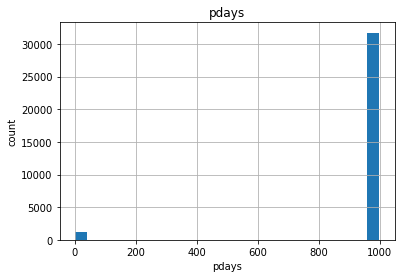

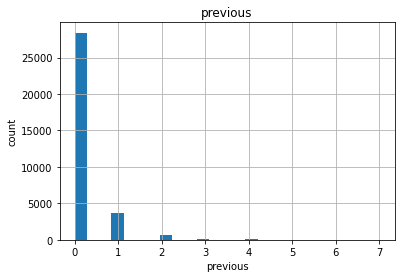

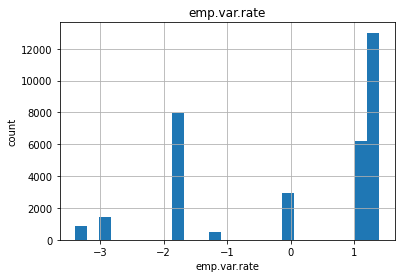

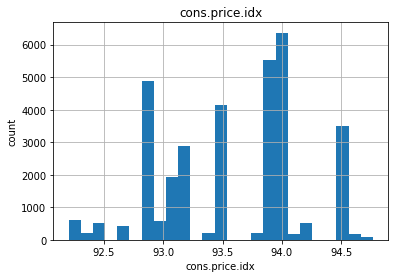

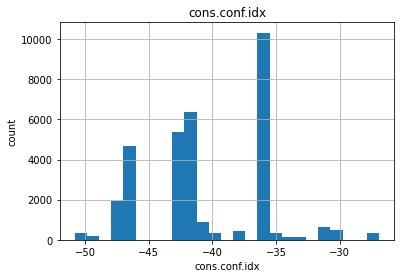

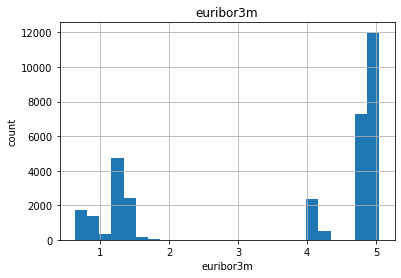

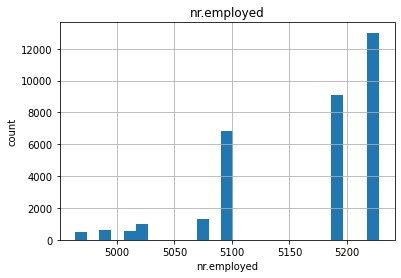

In [105]:
for feature in conti_feature:  #analyzed the conti variable by creating histograms to understand there distribution
    if feature in 'Id':
        pass
    else:
        bank[feature].hist(bins = 25)  
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

In [106]:
conti_feature

['Id',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [107]:
bank[conti_feature].dtypes

Id                  int64
age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [108]:
bank["y"].value_counts() #highly unbalanced data set

no     29238
yes     3712
Name: y, dtype: int64

In [109]:
bank["y"].value_counts(normalize = True) #normalize = True print proportion instead of number

no     0.887344
yes    0.112656
Name: y, dtype: float64

In [110]:
bank.groupby('y').mean() #analysis of all continuous variable with target output(object/cate.)

,Id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,
no,19389.242629,39.907825,221.148198,2.624803,983.853171,0.133867,0.244894,93.603230,-40.599726,3.805912,5175.925802
yes,30303.521552,40.851293,549.398976,2.054957,790.336207,0.496498,-1.214628,93.360464,-39.789844,2.141401,5095.804122


In [111]:
bank.drop(['pdays','previous'],1,inplace=True)

##### To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice. To reduce left skewness, we take squares or cubes or higher powers. DUE TO THE PRESENCE OF OUTLIER ONLY, ANY GRAPH WOULD BE SKEWED(LIKE IT MAY SHIFT TO THE LEFT OR TIGHT SIDE, WHICH ISNT GOOD). DUE TO THE PRESENCE OF OUTLIER, THE MEAN AND STD. DEVIATION ARE MOSTLY AFFECTED, MEDIAN AND MODE ARENT THAT AFFECTION. THAT Y WHEREVER WE HAV EMISSING VALUE IN A PARTICULAR COLUMN, THEN WE SHOULD TRY TO REPLACE IT BY THE MEDIAN OF THAT PARTOCULAR COLUMN(SINCE MEDIAN ISNT AFFECTED MUCH BY PRESENCE OF OUTLIERS, NEVER USE MEAN TO IMPUTE MISSING VALUE IN A COLUMN SINCE MEAN ARE LARGELY AFFECTED BY OUTLIER PRESENCE) ----------IMPORTANT

<AxesSubplot:ylabel='Frequency'>

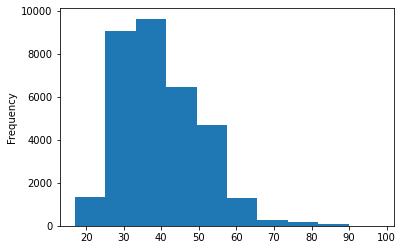

In [112]:
bank['age'].plot.hist()

In [113]:
bank['age'] = np.log(bank['age'])

<AxesSubplot:ylabel='Frequency'>

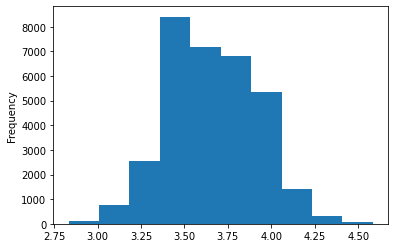

In [114]:
bank['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

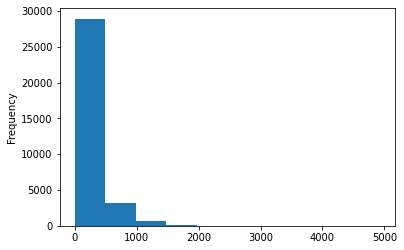

In [115]:
bank['duration'].plot.hist()

In [116]:
bank['duration'] = np.power(bank['duration'],1/3)

<AxesSubplot:ylabel='Frequency'>

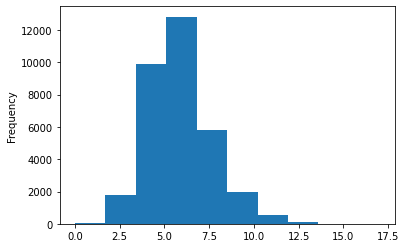

In [117]:
bank['duration'].plot.hist()

In [118]:
bank['campaign'] = np.log(bank['campaign'])

<AxesSubplot:ylabel='Frequency'>

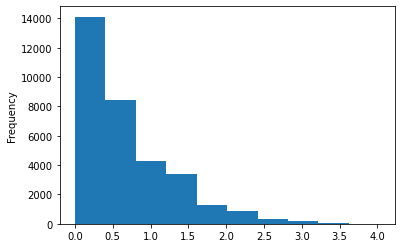

In [119]:
bank['campaign'].plot.hist()

In [120]:
bank.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,3.891820,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,6.100170,1.386294,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,26010,3.610918,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,5.867464,0.693147,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,40194,4.356709,retired,married,basic.4y,no,no,no,cellular,jul,mon,10.470818,0.000000,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,297,3.583519,admin.,married,university.degree,no,yes,no,telephone,may,mon,4.932424,0.693147,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,36344,4.077537,retired,divorced,university.degree,no,no,no,cellular,jun,tue,7.166096,0.693147,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


In [121]:
conti_feature

['Id',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

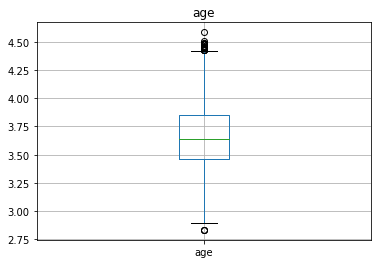

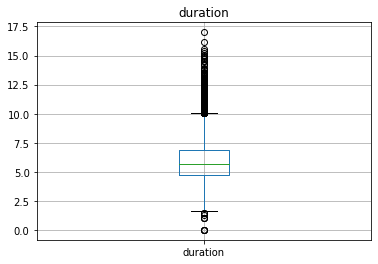

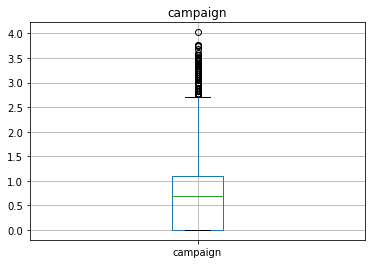

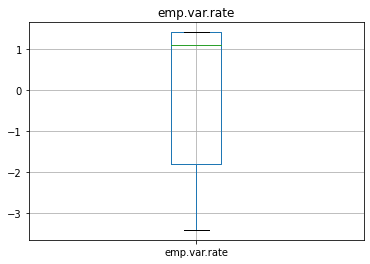

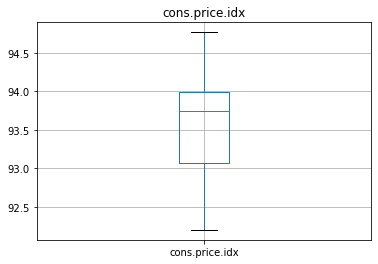

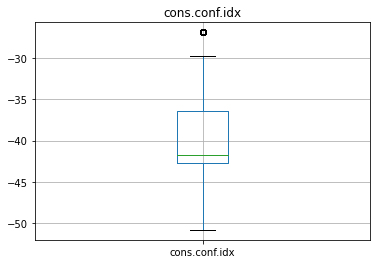

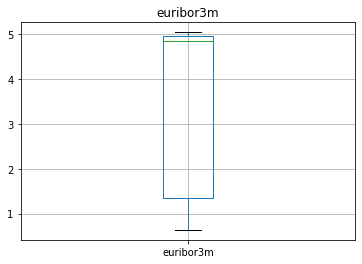

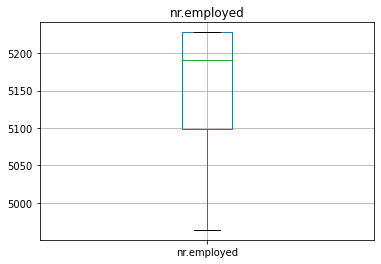

In [123]:
for feature in conti_feature:  #analyzed presence of outlier in conti by creating boxplot to understand there distribution
    if feature in ['Id','pdays','previous']:
        pass
    else:
        bank[feature].plot.box(grid = True)
        plt.title(feature)
        plt.show()

<AxesSubplot:>

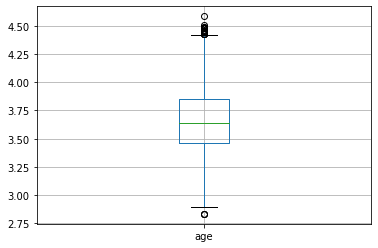

In [124]:
bank['age'].plot.box(grid = True)

In [125]:
bank = bank[bank['age']<4.30]

<AxesSubplot:>

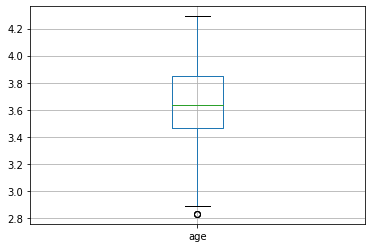

In [126]:
bank['age'].plot.box(grid = True)

In [127]:
bank = bank[bank['age']>2.9]

<AxesSubplot:>

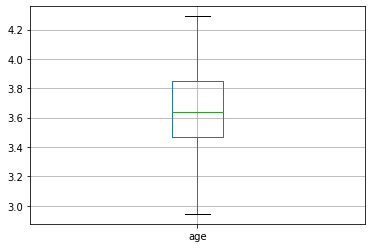

In [128]:
bank['age'].plot.box(grid = True)

<AxesSubplot:>

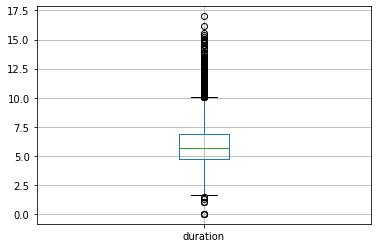

In [129]:
bank['duration'].plot.box(grid=True)

In [130]:
bank = bank[bank['duration']<9.7]

In [131]:
bank = bank[bank['duration']>2.4]

<AxesSubplot:>

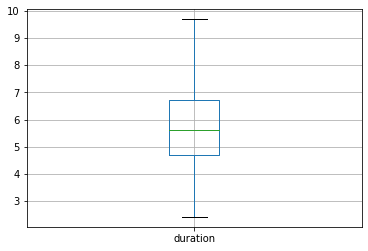

In [132]:
bank['duration'].plot.box(grid=True)

<AxesSubplot:>

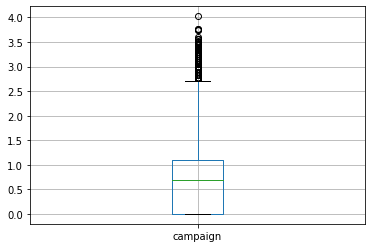

In [133]:
bank['campaign'].plot.box(grid = True)

In [134]:
bank = bank[bank['campaign']<2.6]

<AxesSubplot:>

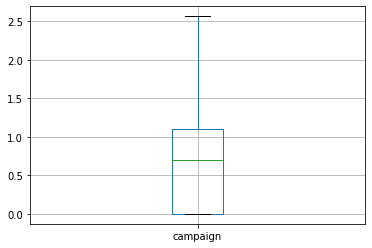

In [135]:
bank['campaign'].plot.box(grid = True)

<AxesSubplot:>

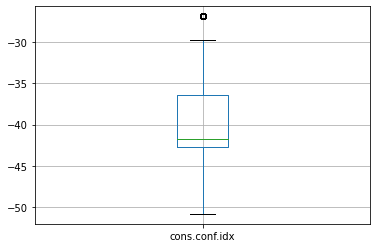

In [136]:
bank['cons.conf.idx'].plot.box(grid = True)

In [137]:
bank = bank[bank['cons.conf.idx']<-30]

<AxesSubplot:>

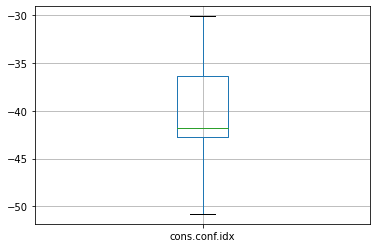

In [138]:
bank['cons.conf.idx'].plot.box(grid = True)

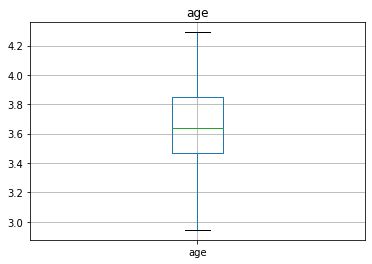

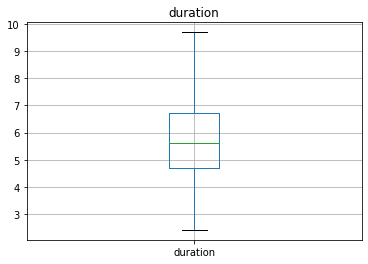

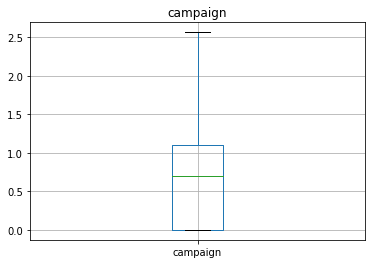

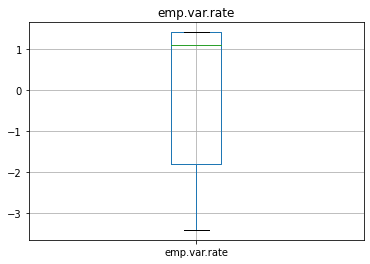

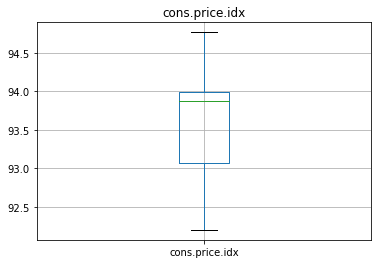

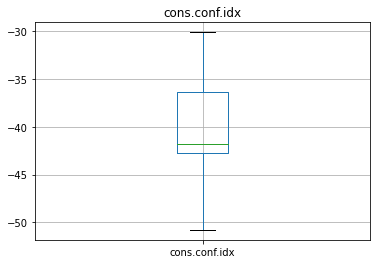

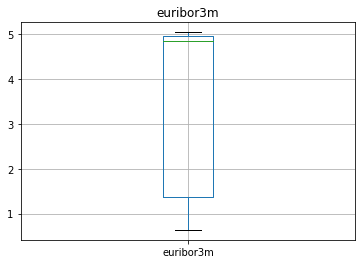

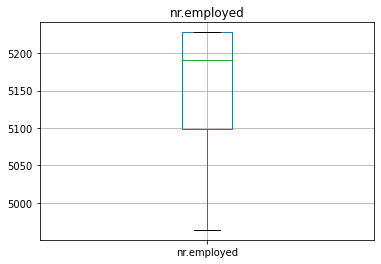

In [139]:
for feature in conti_feature:  #analyzed presence of outlier in conti by creating boxplot to understand there distribution
    if feature in ['Id','pdays','previous']:
        pass
    else:
        bank[feature].plot.box(grid = True)
        plt.title(feature)
        plt.show()

In [140]:
bank.dtypes

Id                  int64
age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Text(0.5, 0.98, '')

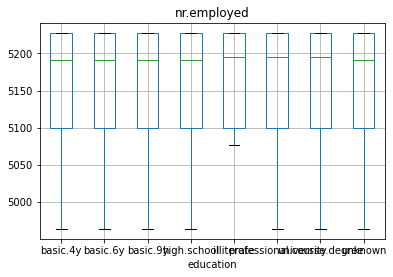

In [141]:
 #syntax for analyzing two variable by box plot(could be done before treating outliers to check outliers)
bank.boxplot(column = 'nr.employed',by = 'education' )
plt.suptitle("")

In [142]:
bank.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,3.891820,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,6.100170,1.386294,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,26010,3.610918,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,5.867464,0.693147,failure,-0.1,93.200,-42.0,4.120,5195.8,no
3,297,3.583519,admin.,married,university.degree,no,yes,no,telephone,may,mon,4.932424,0.693147,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,36344,4.077537,retired,divorced,university.degree,no,no,no,cellular,jun,tue,7.166096,0.693147,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
5,21806,3.367296,admin.,single,university.degree,no,no,no,cellular,aug,wed,6.349604,0.693147,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no


<AxesSubplot:xlabel='y'>

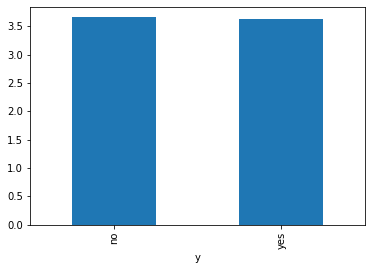

In [88]:
#groupby is used to analyze one continuous and one categorical variable(incase required)
bank.groupby('y')['age'].mean().plot.bar()

In [91]:
bank.groupby('y')['age'].count()

y
no     27614
yes     2815
Name: age, dtype: int64

### Categorical variable

In [143]:
cate_feature = [feature for feature in bank.columns if (bank[feature].dtypes == 'O')]
print(len(cate_feature))
bank[cate_feature].head()

11


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no
5,admin.,single,university.degree,no,no,no,cellular,aug,wed,nonexistent,no


In [144]:
#to check if there's any spelling errors
temp = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for i in temp:
    print('*** Value count in',i,'***')
    print(bank[i].value_counts())
    print('')

*** Value count in job ***
admin.           7718
blue-collar      6984
technician       5057
services         3014
management       2176
entrepreneur     1072
retired          1023
self-employed    1012
housemaid         781
unemployed        729
student           628
unknown           235
Name: job, dtype: int64

*** Value count in marital ***
married     18457
single       8530
divorced     3385
unknown        57
Name: marital, dtype: int64

*** Value count in education ***
university.degree      9001
high.school            7055
basic.9y               4493
professional.course    3902
basic.4y               2978
basic.6y               1726
unknown                1259
illiterate               15
Name: education, dtype: int64

*** Value count in default ***
no         23918
unknown     6508
yes            3
Name: default, dtype: int64

*** Value count in housing ***
yes        15941
no         13742
unknown      746
Name: housing, dtype: int64

*** Value count in loan ***
no         250

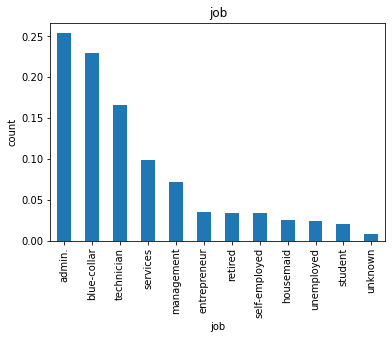

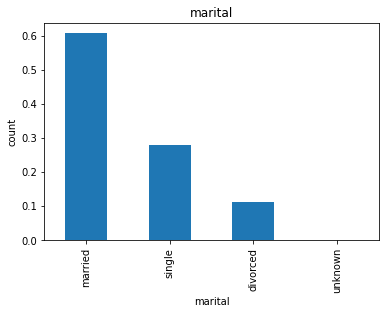

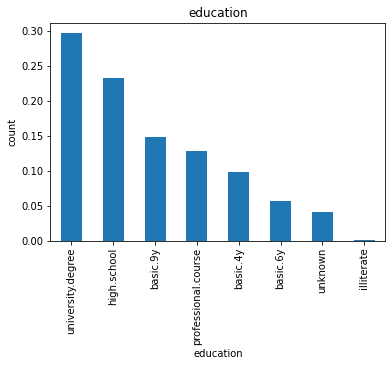

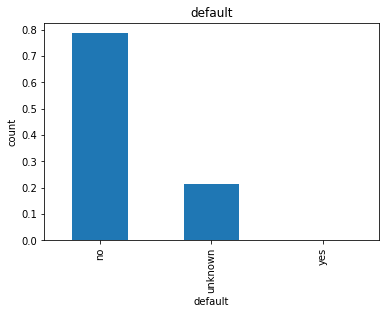

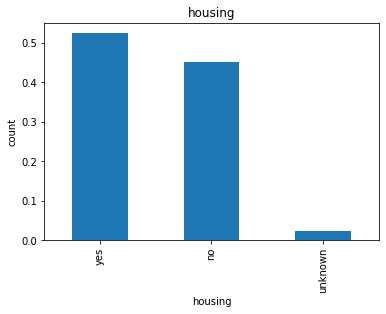

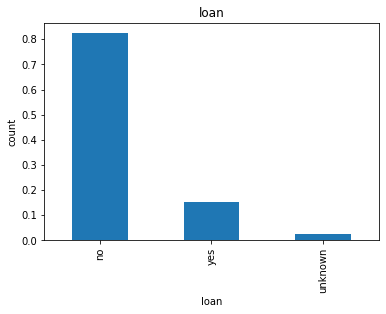

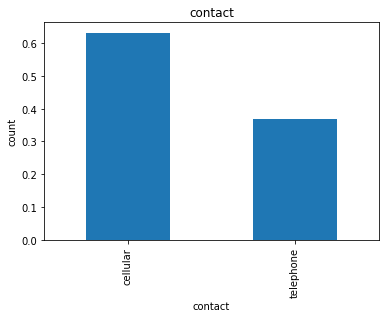

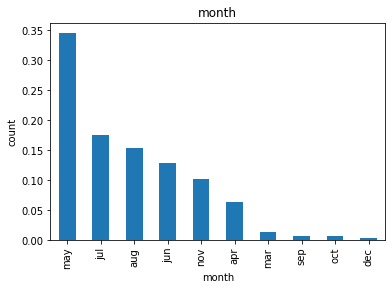

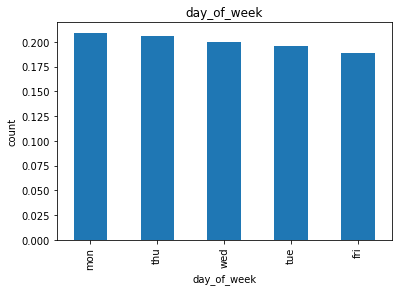

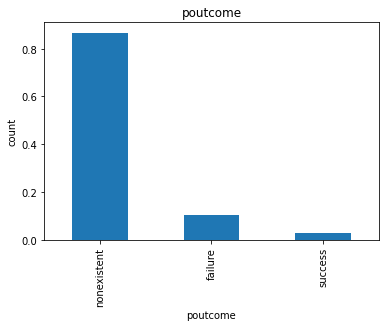

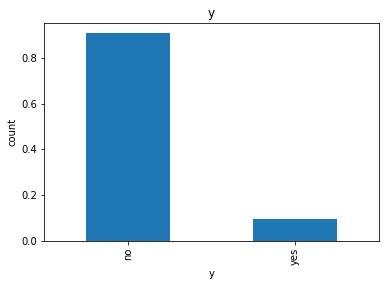

In [145]:
for feature in cate_feature: #gives value counts of each cate_feature
    (bank[feature].value_counts()/len(bank)).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [146]:
pd.crosstab(bank.job,bank.loan).head()

loan,no,unknown,yes
job,,,
admin.,6280,172,1266
blue-collar,5750,188,1046
entrepreneur,889,26,157
housemaid,648,20,113
management,1788,58,330


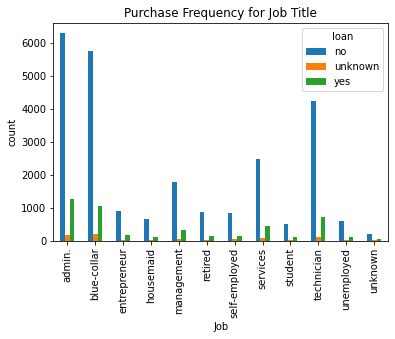

In [147]:
#just an example of how we can view two categorical independent variable together(USE CROSS TAB), just for analysis
pd.crosstab(bank.job,bank.loan).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('count')
plt.savefig('purchase_fre_job')

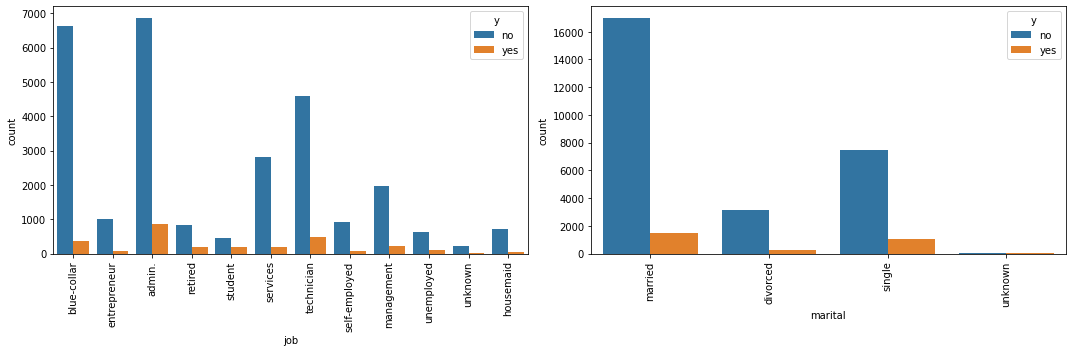

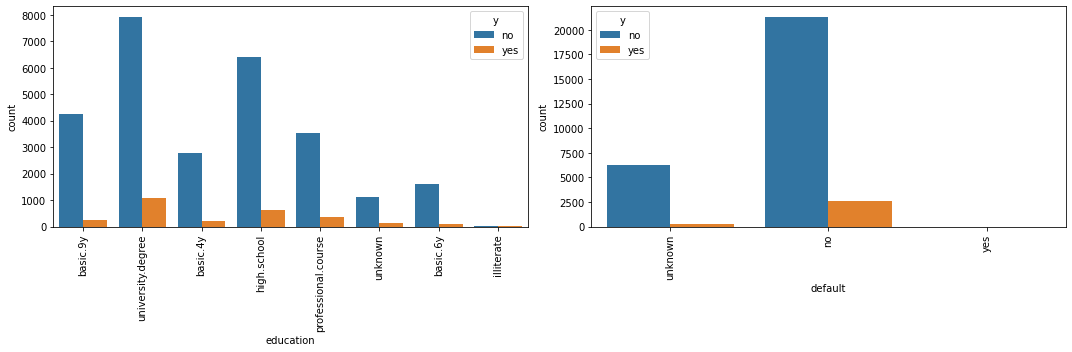

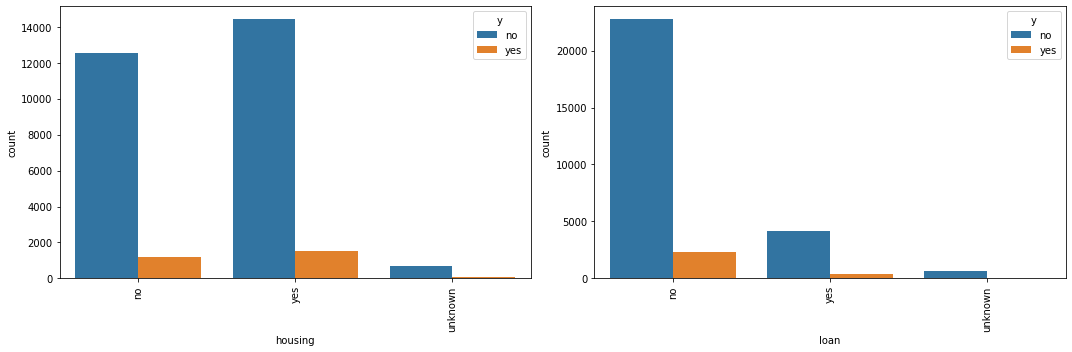

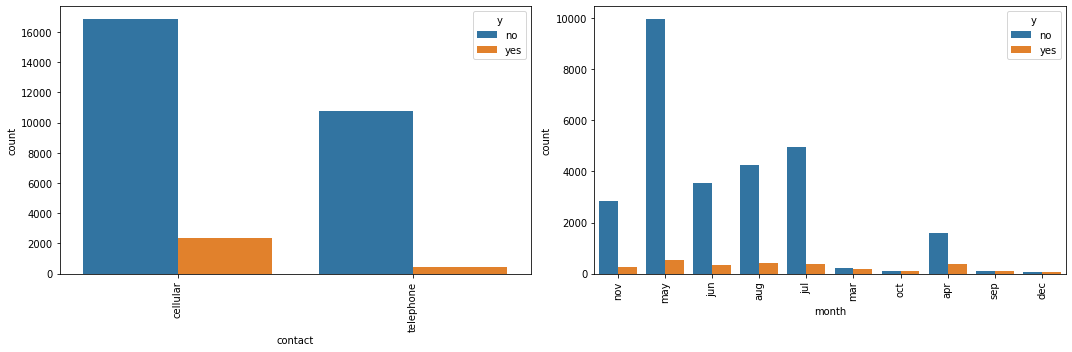

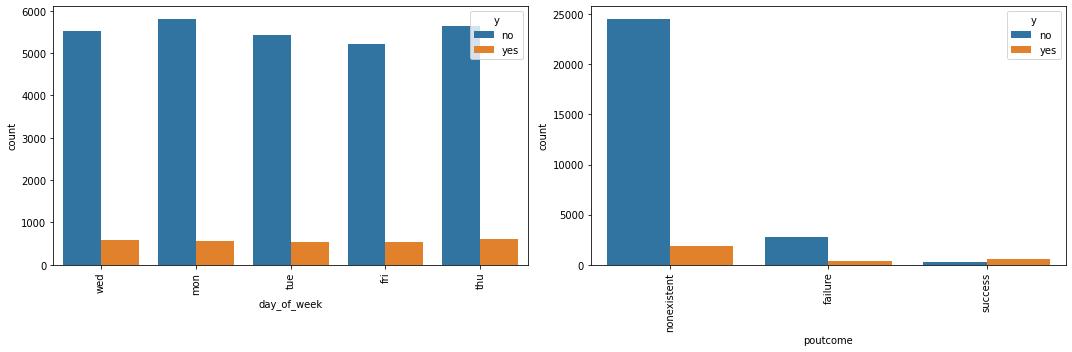

In [148]:
#count plot for knowing no of occurences
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(bank,bank['y'])

#### Observation - for eg. education - there are 8 types of educational designation given. Majority employee have univeristy degree qualification(since its count is mose high(refer value_count graph) & minimal employees are illeterate. employees who have univeristy degree have subscribed more for term deposit(well, that makes sense too). SO, in future it is meaningful to reach those employees who have a university degree(refer 2nd graphs)

In [149]:
# Impute mising(UNKNOWN) values of categorical data with mode
def impute_mode(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            dataframe[col]=dataframe[col].str.replace('unknown',dataframe[col].mode()[0])
    return dataframe

dataframe = impute_mode(bank)

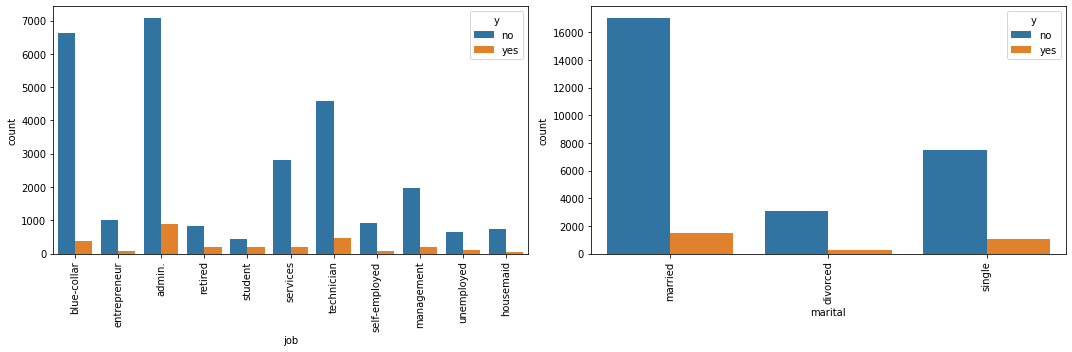

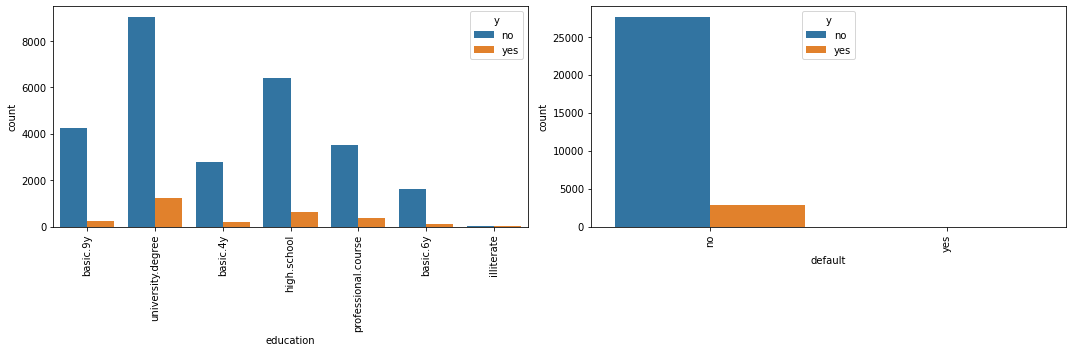

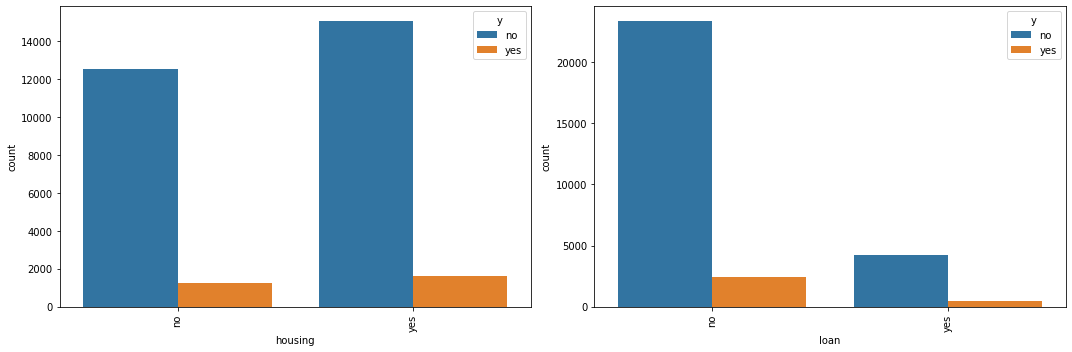

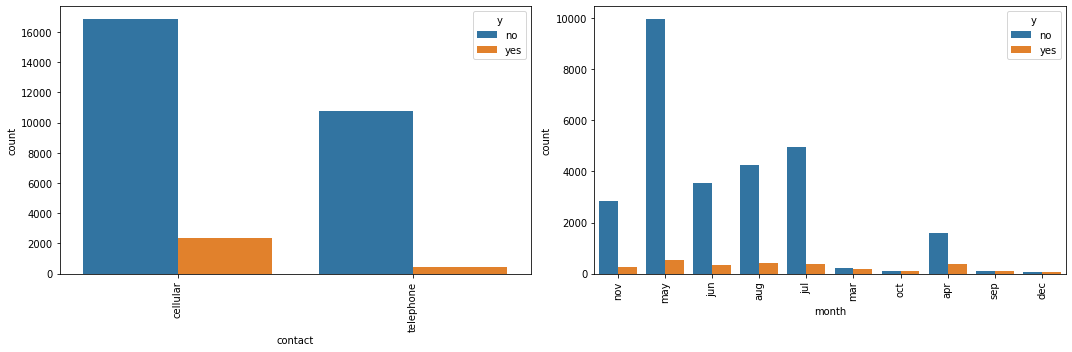

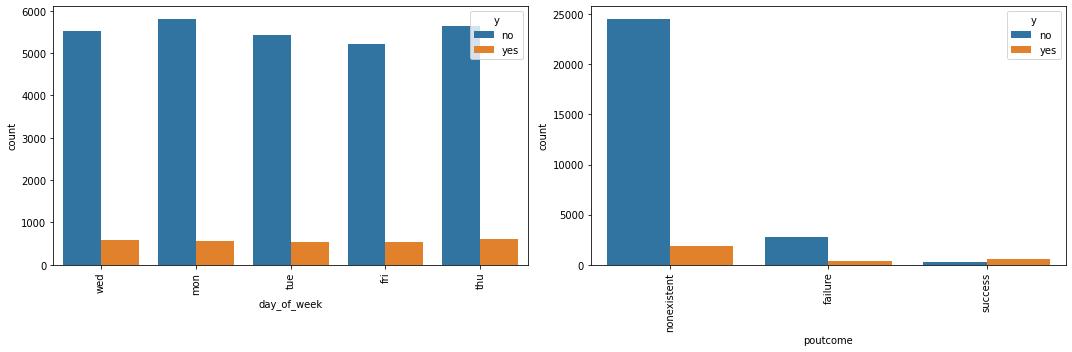

In [47]:
bivariate_analysis_categorical(bank,bank['y'])

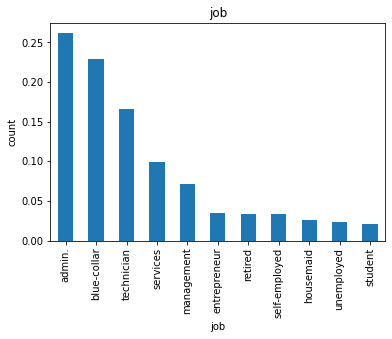

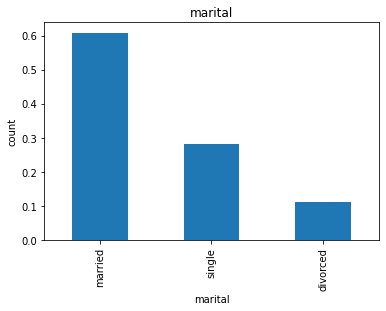

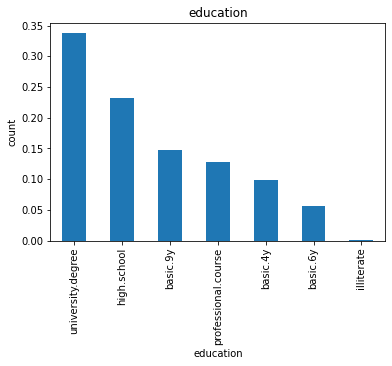

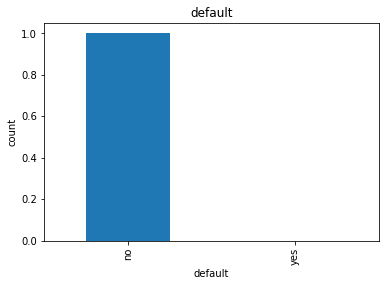

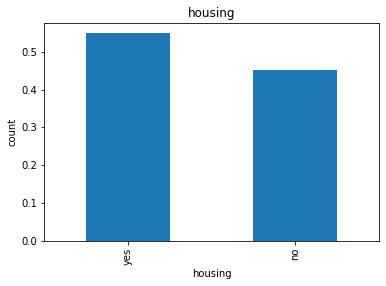

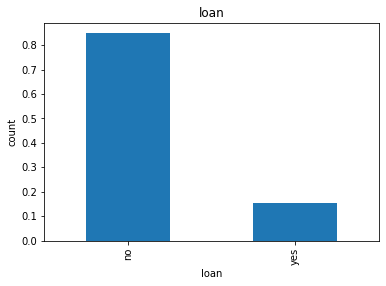

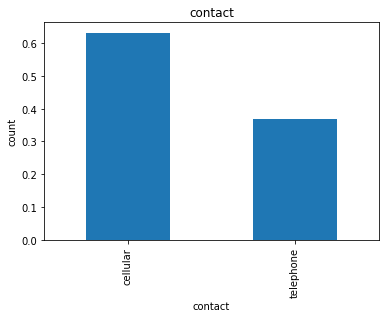

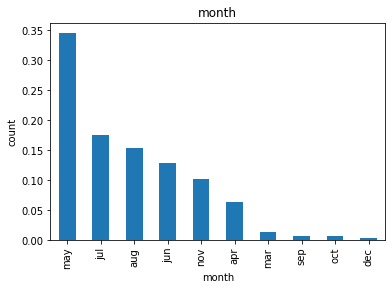

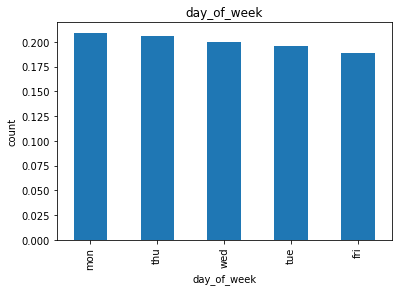

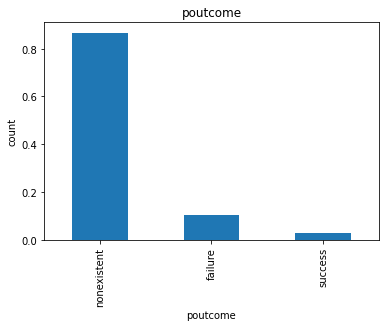

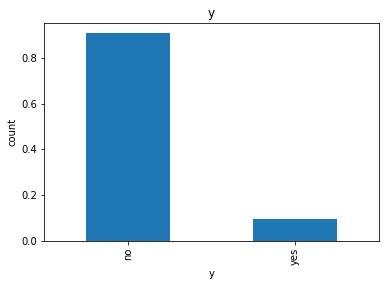

In [150]:
for feature in cate_feature:
    (bank[feature].value_counts()/len(bank)).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [151]:
bank[cate_feature].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no
5,admin.,single,university.degree,no,no,no,cellular,aug,wed,nonexistent,no


In [152]:
for col in bank[cate_feature].columns:              #in order to check that how many labels each categorical feature has 
    print(col ,':' ,len(bank[col].unique()),'labels')        #data[col] give us the values inside the dataset col. by col.

job : 11 labels
marital : 3 labels
education : 7 labels
default : 2 labels
housing : 2 labels
loan : 2 labels
contact : 2 labels
month : 10 labels
day_of_week : 5 labels
poutcome : 3 labels
y : 2 labels


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
dataframe = dummyEncode(bank)


In [53]:
bank.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,3.891820,1,1,2,0,0,0,0,7,4,6.100170,1.386294,1,-0.1,93.200,-42.0,4.120,5195.8,0
1,26010,3.610918,2,1,6,0,0,0,1,7,4,5.867464,0.693147,0,-0.1,93.200,-42.0,4.120,5195.8,0
3,297,3.583519,0,1,6,0,1,0,1,6,1,4.932424,0.693147,1,1.1,93.994,-36.4,4.857,5191.0,0
4,36344,4.077537,5,0,6,0,0,0,0,4,3,7.166096,0.693147,1,-2.9,92.963,-40.8,1.262,5076.2,0
5,21806,3.367296,0,2,6,0,0,0,0,1,4,6.349604,0.693147,1,1.4,93.444,-36.1,4.964,5228.1,0


In [54]:
bank.drop('Id',1,inplace = True)

In [55]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3.891820,1,1,2,0,0,0,0,7,4,6.100170,1.386294,1,-0.1,93.200,-42.0,4.120,5195.8,0
1,3.610918,2,1,6,0,0,0,1,7,4,5.867464,0.693147,0,-0.1,93.200,-42.0,4.120,5195.8,0
3,3.583519,0,1,6,0,1,0,1,6,1,4.932424,0.693147,1,1.1,93.994,-36.4,4.857,5191.0,0
4,4.077537,5,0,6,0,0,0,0,4,3,7.166096,0.693147,1,-2.9,92.963,-40.8,1.262,5076.2,0
5,3.367296,0,2,6,0,0,0,0,1,4,6.349604,0.693147,1,1.4,93.444,-36.1,4.964,5228.1,0


## Splitting the dataset

In [56]:
X = bank.drop('y',axis=1)
y = bank['y']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(21300, 18)
(9129, 18)
(21300,)
(9129,)


In [58]:
bank['y'].value_counts() #imbalanced dataset

0    27614
1     2815
Name: y, dtype: int64

# SMOTE

In [59]:
from collections import Counter #smote used because the dataset was imbalanced(counter helps in counting just)
from imblearn.combine import SMOTETomek
smt=SMOTETomek(0.80) #80% of the data 
X_train_smt,y_train_smt=smt.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

C:\Users\sanjay\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 19316, 1: 1984})
The number of classes after fit Counter({0: 19278, 1: 15414})


###### X_train and y_train are the original spilitted set(which was imbalanced)
###### X_train_smt and y_train_smt are the splitted sets on which smote technique is applied( to make it balanced)

## MODEL 1 - LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
logreg.fit(X_train_smt, y_train_smt)

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [61]:
y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.85


In [62]:
type(y_pred) , type(y_val)

(numpy.ndarray, pandas.core.series.Series)

In [63]:
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[7083 1215]
 [ 155  676]]


In [64]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8298
           1       0.36      0.81      0.50       831

    accuracy                           0.85      9129
   macro avg       0.67      0.83      0.70      9129
weighted avg       0.92      0.85      0.87      9129



#### Incorporating k fold and hyperparameter tuning and again fitting the model

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']} #c parameter is inverse of regularization strength
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 0)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
clf = GridSearchCV(logreg, param_grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_smt,y_train_smt)

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [66]:
y_pred = clf.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.70


In [67]:
print(clf.best_params_)

{'C': 100.0, 'penalty': 'l2'}


AxesSubplot(0.125,0.125;0.62x0.755)
[[7071 1227]
 [ 154  677]]


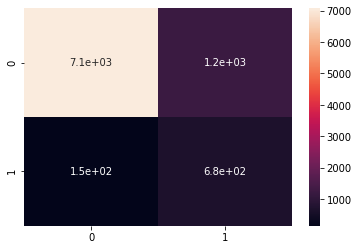

In [68]:
## Check this link : https://stackoverflow.com/questions/55845173/sklearn-confusion-matrix-typeerror-numpy-ndarray-object-is-not-callable
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(sns.heatmap(cm, annot=True))
print(cm)

In [69]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8298
           1       0.36      0.81      0.50       831

    accuracy                           0.85      9129
   macro avg       0.67      0.83      0.70      9129
weighted avg       0.92      0.85      0.87      9129



#### plot auc - roc curve too as this curve determines the ability of the model to correctly classifiy tre positive and true negatives

#### Fetaure selection

In [71]:
from sklearn.feature_selection import RFE  
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_smt,y_train_smt)  
#fitting the data to model
logreg.fit(X_rfe,y_train_smt)

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or 

LogisticRegression()

In [72]:
#no of features (STEP 2)
nof_list=np.arange(1,13)   #this range could be from (1,total no. of feature in the dataset)         
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    rfe = RFE(logreg,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_smt,y_train_smt)
    X_test_rfe = rfe.transform(X_val)
    logreg.fit(X_train_rfe,y_train_smt)
    score = logreg.score(X_test_rfe,y_val)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or 

Optimum number of features: 1
Score with 1 features: 0.908971


In [74]:
cols = list(X.columns) #(STEP 3)
#Initializing RFE model
rfe = RFE(logreg, 1)   #as in above code with 11 feature everything seems best           
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_smt,y_train_smt)  
#Fitting the data to model
logreg.fit(X_rfe,y_train_smt)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

Index(['loan'], dtype='object')


### 2. embedded method (lassocv)

In [75]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X_train_smt, y_train_smt)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_val,y_val))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.022194
Best score using built-in LassoCV: -0.464710


In [76]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 12 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

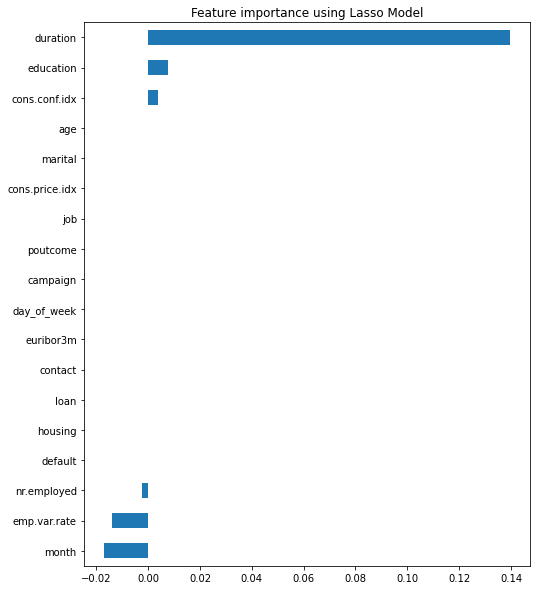

In [77]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### 3. extratreeclassifier

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_smt,y_train_smt)

ExtraTreesClassifier()

In [100]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[4.55598104e-02 4.20713596e-02 2.36014639e-02 3.94738151e-02
 1.67508913e-06 1.79726469e-02 1.51661211e-02 4.74683569e-02
 1.92442631e-02 4.10739011e-02 2.78319864e-01 4.74193481e-02
 2.10744371e-02 5.91786071e-02 2.84488368e-02 3.31794576e-02
 1.52561986e-01 8.81840500e-02]


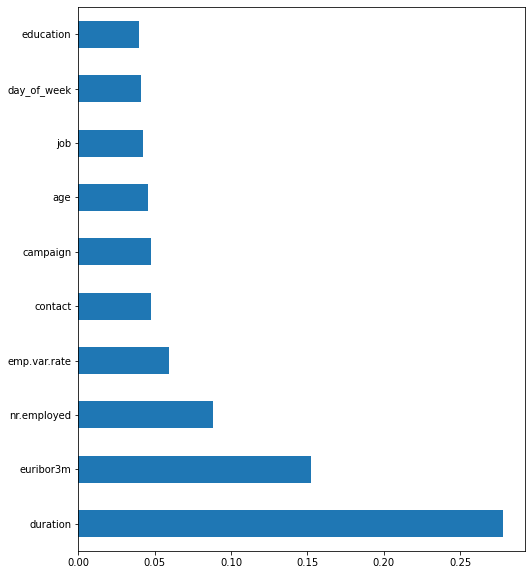

In [107]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

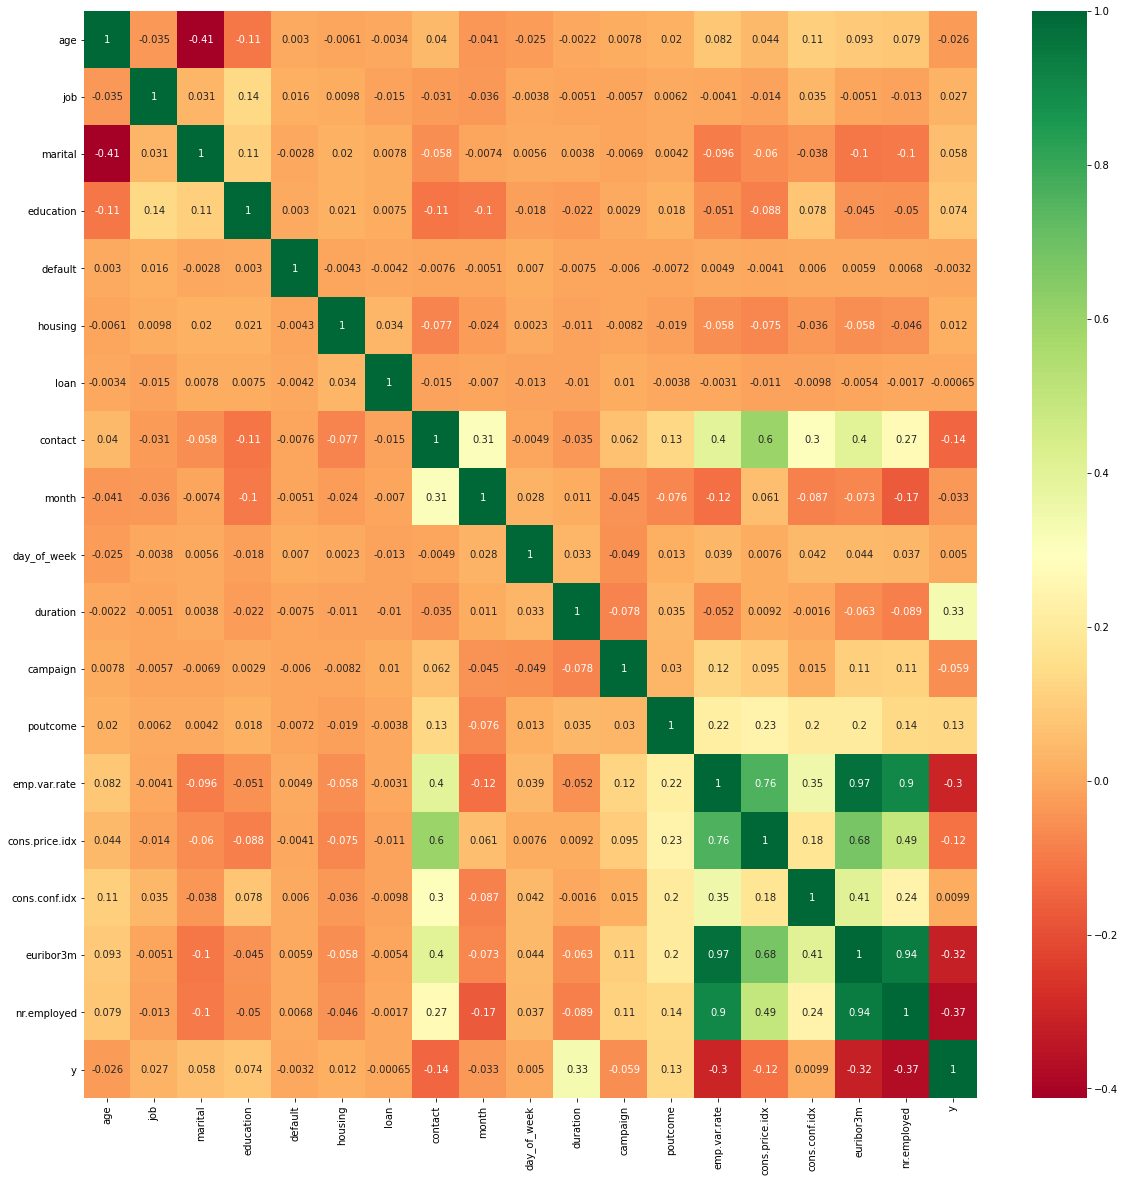

In [109]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = bank.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bank[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### now lets again build x and y and train the model using only those features which feature selection techniques considers as imp. and drop the rest 

In [222]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [223]:
X_fs = bank.drop(['default','loan','emp.var.rate','poutcome',
                  'day_of_week','cons.price.idx','nr.employed','y'],axis=1)
y_fs = bank['y']

In [224]:
X_train, X_val, y_train, y_val = train_test_split(X_fs, y_fs, test_size=0.3, random_state=0)
X_train_smt,y_train_smt=smt.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

The number of classes before fit Counter({0: 19316, 1: 1984})
The number of classes after fit Counter({0: 19208, 1: 15344})


In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
logreg = LogisticRegression(C = 100)
logreg.fit(X_train_smt, y_train_smt)

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100)

In [226]:
y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.84


In [229]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# sns.heatmap(cm, annot=True)
print(cm)

[[7007 1291]
 [ 156  675]]


In [230]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8298
           1       0.34      0.81      0.48       831

    accuracy                           0.84      9129
   macro avg       0.66      0.83      0.69      9129
weighted avg       0.92      0.84      0.87      9129



## MODEL 2 - DECISION TREE

In [231]:
X = bank.drop('y',axis=1)
y = bank['y']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_smt,y_train_smt=smt.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

The number of classes before fit Counter({0: 19316, 1: 1984})
The number of classes after fit Counter({0: 19280, 1: 15416})


In [232]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_smt, y_train_smt)
y_pred = dtc.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtc.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.89


In [234]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# print(sns.heatmap(cm, annot=True))
print(cm)

[[7658  640]
 [ 355  476]]


In [235]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8298
           1       0.43      0.57      0.49       831

    accuracy                           0.89      9129
   macro avg       0.69      0.75      0.71      9129
weighted avg       0.91      0.89      0.90      9129



#### Incorporating k fold and hyperparameter tuning and again fitting the model

In [301]:
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid = {"criterion":['gini','entropy'],
              "max_depth": range(1,30), 
              "max_leaf_nodes": range(2,30), #max_leaf_node could not start from 1
              "min_samples_leaf": randint(1,20),
              "min_samples_split":range(1,30),
             "splitter":['best','random']} 
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 42)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
rsc = RandomizedSearchCV(dtc,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
rsc.fit(X_train_smt,y_train_smt)
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 27, 'min_samples_leaf': 19, 'min_samples_split': 23, 'splitter': 'best'}
Best score is 0.8882579107438099


In [303]:
y_pred = rsc.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(rsc.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.88


In [304]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# print(sns.heatmap(cm, annot=True))

In [305]:
print(cm)

[[7336  962]
 [ 137  694]]


In [306]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8298
           1       0.42      0.84      0.56       831

    accuracy                           0.88      9129
   macro avg       0.70      0.86      0.74      9129
weighted avg       0.93      0.88      0.90      9129



### feature selection

In [310]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [311]:
X_fs = bank.drop(['default','loan','emp.var.rate','poutcome',
                  'day_of_week','cons.price.idx','nr.employed','y'],axis=1)
y_fs = bank['y']

In [312]:
X_train, X_val, y_train, y_val = train_test_split(X_fs, y_fs, test_size=0.3, random_state=0)
X_train_smt,y_train_smt=smt.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

The number of classes before fit Counter({0: 19316, 1: 1984})
The number of classes after fit Counter({0: 19207, 1: 15343})


In [317]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc = DecisionTreeClassifier(criterion = 'gini',max_depth = 7,
                              max_leaf_nodes=27, min_samples_leaf =19, min_samples_split=23, splitter ='best')
dtc.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=27, min_samples_leaf=19,
                       min_samples_split=23)

In [318]:
y_pred = dtc.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(dtc.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.86


In [319]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# sns.heatmap(cm, annot=True)
print(cm)

[[7164 1134]
 [ 107  724]]


In [320]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8298
           1       0.39      0.87      0.54       831

    accuracy                           0.86      9129
   macro avg       0.69      0.87      0.73      9129
weighted avg       0.93      0.86      0.89      9129



# MODEL 3 - XGBOOST

In [321]:
from xgboost import XGBClassifier

In [322]:
X = bank.drop('y',axis=1)
y = bank['y']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_smt,y_train_smt=smt.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

The number of classes before fit Counter({0: 19316, 1: 1984})
The number of classes after fit Counter({0: 19285, 1: 15421})


In [323]:
xgb = XGBClassifier()
xgb.fit(X_train_smt, y_train_smt)
y_pred = xgb.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(xgb.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.92
